In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The sales table here is the summarized sales of sales_2015, sales_2016, sales_2017

In [3]:
AW_C = pd.read_csv("D:\Harnek\Capstone\SQL\ML\Dataset\AdventureWorks_Customers.csv", encoding="latin1")
AW_PC = pd.read_csv("D:\Harnek\Capstone\SQL\ML\Dataset\AdventureWorks_Product_Categories.csv")
AW_PSC = pd.read_csv("D:\Harnek\Capstone\SQL\ML\Dataset\AdventureWorks_Product_Subcategories.csv")
AW_P = pd.read_csv("D:\Harnek\Capstone\SQL\ML\Dataset\AdventureWorks_Products.csv")
AW_R = pd.read_csv("D:\Harnek\Capstone\SQL\ML\Dataset\AdventureWorks_Returns.csv")
AW_T = pd.read_csv("D:\Harnek\Capstone\SQL\ML\Dataset\AdventureWorks_Territories.csv")
AW_S = pd.read_csv("D:\Harnek\Capstone\SQL\ML\Dataset\Sales.csv")

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:4: SyntaxWarning: invalid escape sequence '\H'
<>:5: SyntaxWarning: invalid escape sequence '\H'
<>:6: SyntaxWarning: invalid escape sequence '\H'
<>:7: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:4: SyntaxWarning: invalid escape sequence '\H'
<>:5: SyntaxWarning: invalid escape sequence '\H'
<>:6: SyntaxWarning: invalid escape sequence '\H'
<>:7: SyntaxWarning: invalid escape sequence '\H'
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\3765214271.py:1: SyntaxWarning: invalid escape sequence '\H'
  AW_C = pd.read_csv("D:\Harnek\Capstone\SQL\ML\Dataset\AdventureWorks_Customers.csv", encoding="latin1")
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\3765214271.py:2: SyntaxWarning: i

In [4]:
AW_S

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,2015-01-01,2001-10-29,SO45082,350,11455,9,1,1
1,2015-01-01,2001-12-05,SO45079,312,29255,4,1,1
2,2015-01-01,2001-09-21,SO45080,332,14657,1,1,1
3,2015-01-01,2001-11-16,SO45081,338,26782,6,1,1
4,2015-01-02,2001-12-18,SO45086,314,18747,9,1,1
...,...,...,...,...,...,...,...,...
56041,2017-06-30,2004-05-13,SO74125,220,11717,1,4,1
56042,2017-06-30,2004-03-13,SO74129,478,18400,4,5,2
56043,2017-06-30,2004-06-15,SO74137,484,22202,9,5,2
56044,2017-06-30,2004-04-10,SO74100,483,21992,9,5,1


In [5]:
AW_S['CustomerKey'].duplicated().sum()

np.int64(38630)

In [6]:
# Checking for null values
datasets = { 
    'Customers': AW_C,
    'Product_Categories': AW_PC,
    'Product_SubCategories': AW_PSC,
    'Products': AW_P,
    'Returns': AW_R,
    'Territories': AW_T,
    'Sales': AW_S
}

for name, df in datasets.items():
    print(f"\n{name} Dataset - Null Values Summary:")
    print(df.isnull().sum())


Customers Dataset - Null Values Summary:
CustomerKey         0
Prefix            130
FirstName           0
LastName            0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

Product_Categories Dataset - Null Values Summary:
ProductCategoryKey    0
CategoryName          0
dtype: int64

Product_SubCategories Dataset - Null Values Summary:
ProductSubcategoryKey    0
SubcategoryName          0
ProductCategoryKey       0
dtype: int64

Products Dataset - Null Values Summary:
ProductKey                0
ProductSubcategoryKey     0
ProductSKU                0
ProductName               0
ModelName                 0
ProductDescription        0
ProductColor             50
ProductSize               0
ProductStyle              0
ProductCost               0
ProductPrice              0
dtype: int64

Returns Dataset - Null Values Summar

In [7]:
# From the above conclusion we found that there are no null values

In [8]:
# Inorder to make any further analysis we need to first connect all the table and make one dataset
# I will be connecting all the dataset with the sales table

In [9]:
# Copying the sales table
df = AW_S.copy()

# Merging with Customers
df = df.merge(AW_C, on='CustomerKey', how='left', suffixes=('', '_cust'))

# Merging with Products
df = df.merge(AW_P, on='ProductKey', how='left', suffixes=('', '_prod'))

# Merging Products → Product Subcategories
df = df.merge(AW_PSC, on='ProductSubcategoryKey', how='left', suffixes=('', '_psc'))

# Merging Product Subcategories → Product Categories
df = df.merge(AW_PC, on='ProductCategoryKey', how='left', suffixes=('', '_pc'))

# ✅ Merging Territories (Sales.TerritoryKey → Territories.SalesTerritoryKey)
df = df.merge(AW_T, left_on='TerritoryKey', right_on='SalesTerritoryKey', how='left', suffixes=('', '_terr'))

# Merging Returns (optional, for return analysis)
df = df.merge(AW_R, on=['ProductKey', 'TerritoryKey'], how='left', suffixes=('', '_ret'))

# Final DataFrame info
print("✅ Final merged DataFrame shape:", df.shape)
print("✅ Columns:", df.columns.tolist()[:20], "...")


✅ Final merged DataFrame shape: (429947, 39)
✅ Columns: ['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey', 'TerritoryKey', 'OrderLineItem', 'OrderQuantity', 'Prefix', 'FirstName', 'LastName', 'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress', 'AnnualIncome', 'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner'] ...


In [10]:
df.dtypes

OrderDate                 object
StockDate                 object
OrderNumber               object
ProductKey                 int64
CustomerKey                int64
TerritoryKey               int64
OrderLineItem              int64
OrderQuantity              int64
Prefix                    object
FirstName                 object
LastName                  object
BirthDate                 object
MaritalStatus             object
Gender                    object
EmailAddress              object
AnnualIncome               int64
TotalChildren              int64
EducationLevel            object
Occupation                object
HomeOwner                 object
ProductSubcategoryKey      int64
ProductSKU                object
ProductName               object
ModelName                 object
ProductDescription        object
ProductColor              object
ProductSize               object
ProductStyle              object
ProductCost              float64
ProductPrice             float64
Subcategor

In [11]:
# Changing all the data types for all the date cols

date_cols = ['OrderDate', 'StockDate', 'ReturnDate']

for col in date_cols:
    if col in df.columns:  # Check column exists
        df[col] = pd.to_datetime(df[col], errors='coerce', format='%Y-%m-%d')

# EDA

In [12]:
# Looking at some basic data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429947 entries, 0 to 429946
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   OrderDate              429947 non-null  datetime64[ns]
 1   StockDate              429947 non-null  datetime64[ns]
 2   OrderNumber            429947 non-null  object        
 3   ProductKey             429947 non-null  int64         
 4   CustomerKey            429947 non-null  int64         
 5   TerritoryKey           429947 non-null  int64         
 6   OrderLineItem          429947 non-null  int64         
 7   OrderQuantity          429947 non-null  int64         
 8   Prefix                 427079 non-null  object        
 9   FirstName              429947 non-null  object        
 10  LastName               429947 non-null  object        
 11  BirthDate              429947 non-null  object        
 12  MaritalStatus          429947 non-null  obje

In [13]:
df.describe()

,OrderDate,StockDate,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,AnnualIncome,TotalChildren,ProductSubcategoryKey,ProductCost,ProductPrice,ProductCategoryKey,SalesTerritoryKey,ReturnDate,ReturnQuantity
count,429947,429947,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,424467,424467.000000
mean,2017-01-11 06:42:57.298131456,2003-11-05 05:23:27.832128128,443.759933,18715.271731,5.997053,2.085064,1.729723,61833.900457,1.911673,29.624782,68.968985,123.603658,3.745203,5.997053,2017-01-11 10:44:01.409579776,1.022190
min,2015-01-01 00:00:00,2001-09-11 00:00:00,214.000000,11000.000000,1.000000,1.000000,1.000000,10000.000000,0.000000,1.000000,0.856500,2.290000,1.000000,1.000000,2015-01-18 00:00:00,1.000000
25%,2016-10-23 00:00:00,2003-08-17 00:00:00,477.000000,13910.000000,4.000000,1.000000,1.000000,40000.000000,0.000000,28.000000,1.866300,4.990000,4.000000,4.000000,2016-10-24 00:00:00,1.000000
50%,2017-01-20 00:00:00,2003-11-13 00:00:00,478.000000,18092.000000,6.000000,2.000000,2.000000,60000.000000,2.000000,31.000000,2.973300,7.950000,4.000000,6.000000,2017-01-19 00:00:00,1.000000
75%,2017-04-15 00:00:00,2004-02-07 00:00:00,528.000000,23165.500000,9.000000,3.000000,2.000000,80000.000000,3.000000,37.000000,12.027800,33.644200,4.000000,9.000000,2017-04-11 00:00:00,1.000000
max,2017-06-30 00:00:00,2004-06-15 00:00:00,606.000000,29483.000000,10.000000,8.000000,3.000000,170000.000000,5.000000,37.000000,2171.294200,3578.270000,4.000000,10.000000,2017-06-30 00:00:00,2.000000
std,NaN,NaN,110.777367,5383.431116,2.938500,0.973138,0.615131,31813.382408,1.656574,8.708358,268.819740,463.229391,0.750740,2.938500,NaN,0.147302


# Checking for null values

In [14]:
df.isnull().sum()

OrderDate                     0
StockDate                     0
OrderNumber                   0
ProductKey                    0
CustomerKey                   0
TerritoryKey                  0
OrderLineItem                 0
OrderQuantity                 0
Prefix                     2868
FirstName                     0
LastName                      0
BirthDate                     0
MaritalStatus                 0
Gender                     2868
EmailAddress                  0
AnnualIncome                  0
TotalChildren                 0
EducationLevel                0
Occupation                    0
HomeOwner                     0
ProductSubcategoryKey         0
ProductSKU                    0
ProductName                   0
ModelName                     0
ProductDescription            0
ProductColor             312291
ProductSize                   0
ProductStyle                  0
ProductCost                   0
ProductPrice                  0
SubcategoryName               0
ProductC

# Checking for duplicated values

In [15]:
df.duplicated().sum()

np.int64(0)

# Sales Analyis

# Univariate Analysis

In [16]:
# Adding the columns like 'Revenue', 'Profit', etc for some more analysis
df['Revenue'] = df['OrderQuantity'] * df['ProductPrice']
df['Profit'] = df['OrderQuantity'] * (df['ProductPrice'] - df['ProductCost'])
df['Year'] = df['OrderDate'].dt.year
df['Quarter'] = df['OrderDate'].dt.quarter
df['Month'] = df['OrderDate'].dt.month

In [17]:
# Creating some more cols
# Creating a profit margin col

df["profitMargin"] = ((df['Profit'] / df['Revenue']) * 100).round(2)

In [18]:
# Customer SpendType (based on Revenue)

df['SpendType'] = pd.cut(
    df['Revenue'],
    bins = [0, 500, 1000, float('inf')],
    labels = ['Low Spend', 'Mid Spend', 'High Spend'] 
)

In [19]:
# Customer SalaryType - based on AnnualIncome

df['SalaryType'] = pd.cut(
    df['AnnualIncome'],
    bins = [0, 50000, 100000, float('inf')],
    labels = ['LowSalaried', 'MidSalaried', 'HighSalaried']
)

In [20]:
# Adding a return rate column

df['ReturnRate'] = df['ReturnQuantity'] / df['OrderQuantity']

In [21]:
# Looking at the Revenue over time 

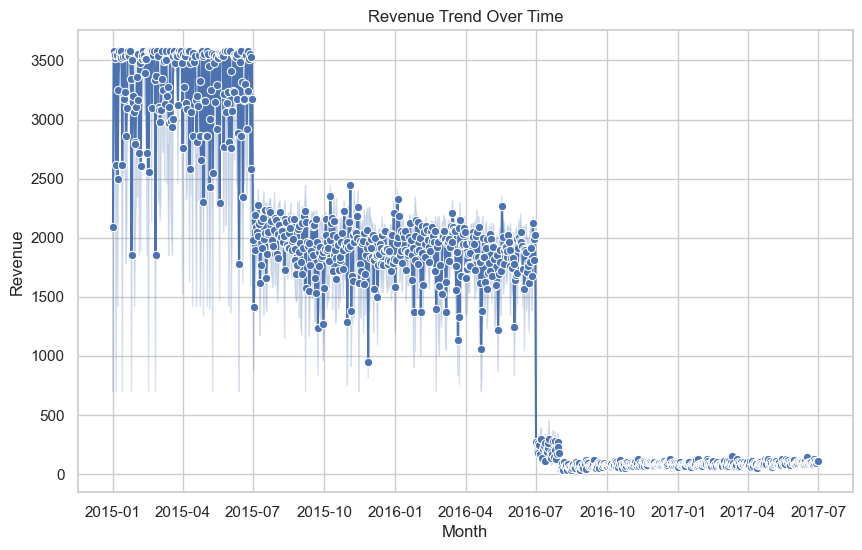

In [22]:
sns.set(style = "whitegrid")

plt.figure(figsize = (10,6))
sns.lineplot( x = 'OrderDate', y = 'Revenue', data = df, marker = 'o')
plt.title('Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [23]:
# Aggregating monthly revenue
monthly_revenue = (
    df.groupby(pd.Grouper(key='OrderDate', freq='M'))['Revenue']
      .sum()
      .reset_index()
)

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\4246581685.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='OrderDate', freq='M'))['Revenue']


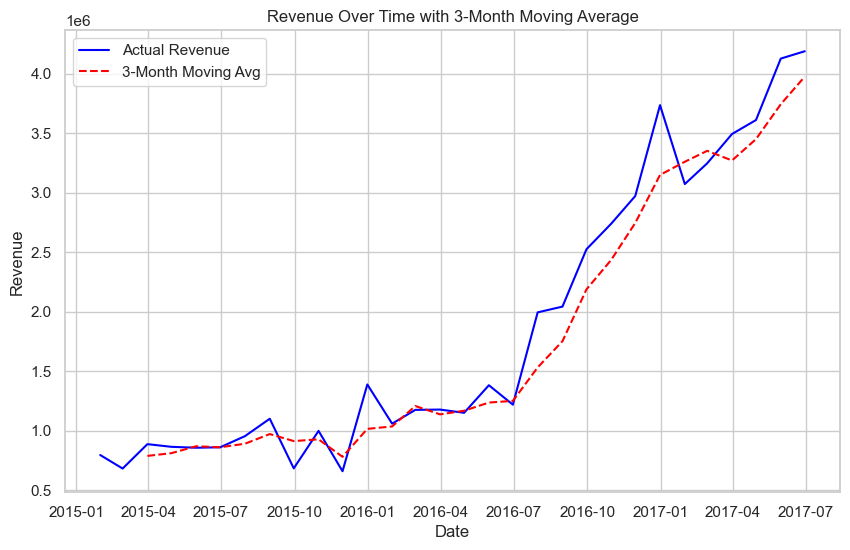

In [24]:
# Calculate 3-Month Moving Average
monthly_revenue['Revenue_MA'] = monthly_revenue['Revenue'].rolling(window=3).mean()

# Plot Revenue vs Moving Average
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['OrderDate'], monthly_revenue['Revenue'], label='Actual Revenue', color='blue')
plt.plot(monthly_revenue['OrderDate'], monthly_revenue['Revenue_MA'], label='3-Month Moving Avg', color='red', linestyle='--')

plt.title('Revenue Over Time with 3-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

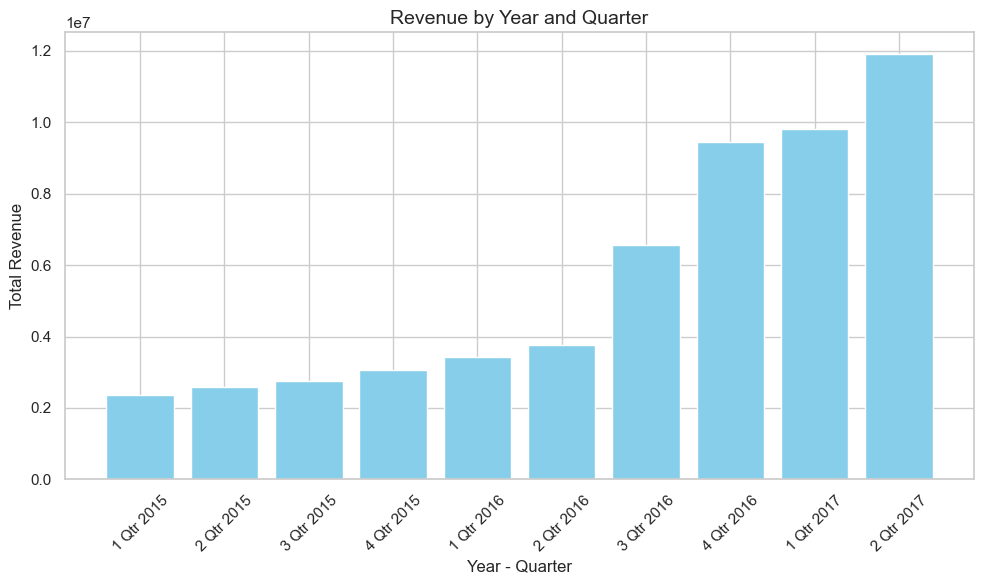

In [25]:
# Looking at revenue wrt to year, qtr
revenue_by_period = df.groupby(['Year', 'Quarter'])['Revenue'].sum().reset_index()

plt.figure(figsize = (10,6))

plt.bar(
    revenue_by_period['Quarter'].astype(str) + ' Qtr ' + revenue_by_period['Year'].astype(str),
    revenue_by_period['Revenue'],
    color='skyblue'
)

plt.title('Revenue by Year and Quarter', fontsize = 14)
plt.xlabel('Year - Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1579423339.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1579423339.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1579423339.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1579423339.py:9: FutureWarning: 

Passing `palette` without assignin

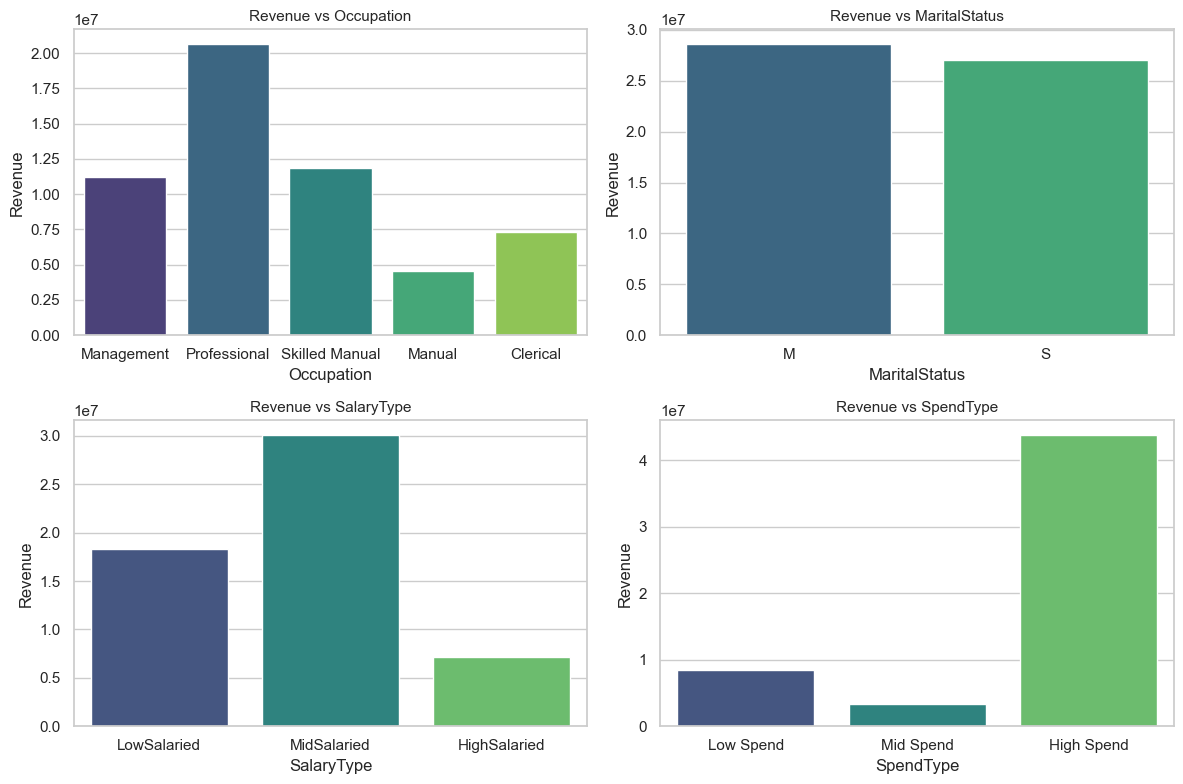

In [26]:
# Looking at revenue wrt to Occupation, MaritalStatus, SalaryType, SpendType

cols = ['Occupation', 'MaritalStatus', 'SalaryType', 'SpendType']

plt.figure(figsize=(12, 8))

for i in range(len(cols)):
    plt.subplot(2, 2, i + 1)  # 2 rows × 2 cols grid
    sns.barplot(data = df, x = cols[i], y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
    plt.title(f'Revenue vs {cols[i]}', fontsize=11)
    plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1248922115.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'CategoryName', y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1248922115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'CategoryName', y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')


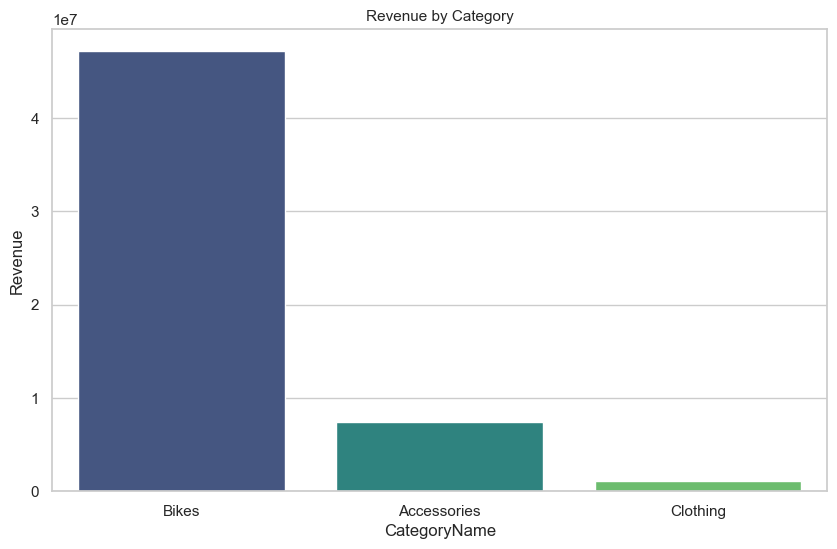

In [27]:
# Revenue by product category

plt.figure(figsize=(10, 6))

sns.barplot(data = df, x = 'CategoryName', y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
plt.title('Revenue by Category', fontsize=11)
plt.xticks(rotation = 0)
plt.show()

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1510283288.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1510283288.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1510283288.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1510283288.py:9: FutureWarning: 

Passing `palette` without assignin

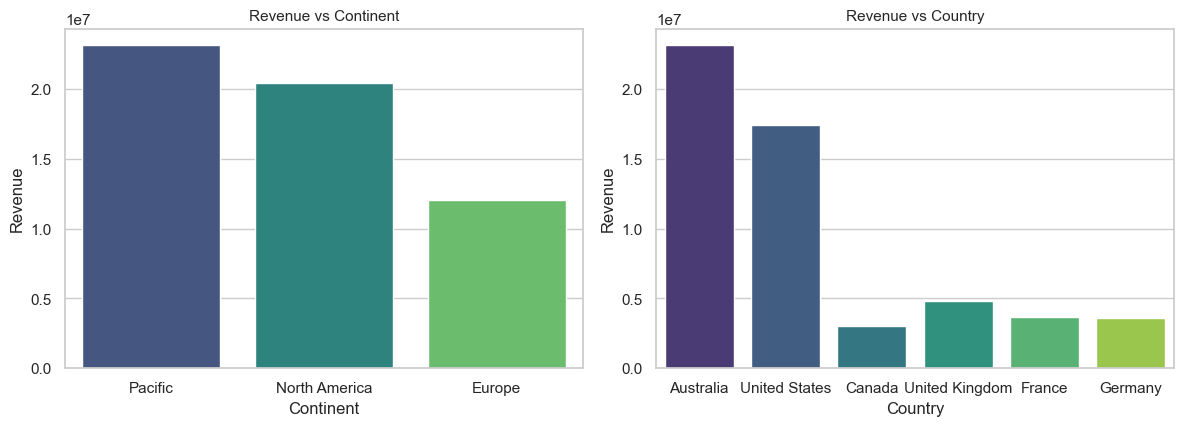

In [28]:
# Revenue based on "Continent", "Country" and "Region"

cols = ['Continent', 'Country']

plt.figure(figsize=(12, 8))

for i in range(len(cols)):
    plt.subplot(2, 2, i + 1)  # 2 rows × 2 cols grid
    sns.barplot(data = df, x = cols[i], y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
    plt.title(f'Revenue vs {cols[i]}', fontsize=11)
    plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\2104466345.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'Region', y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\2104466345.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Region', y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')


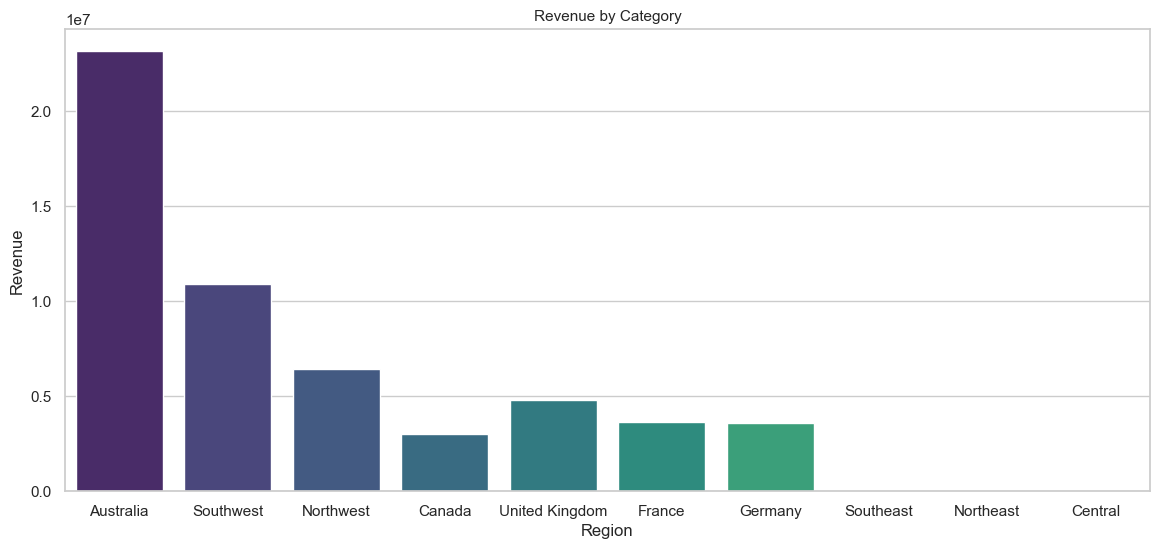

In [29]:
# Revenue based on "Region"

plt.figure(figsize=(14, 6))

sns.barplot(data = df, x = 'Region', y = 'Revenue', estimator = 'sum', ci = None, palette = 'viridis')
plt.title('Revenue by Category', fontsize=11)
plt.xticks(rotation = 0)
plt.show()

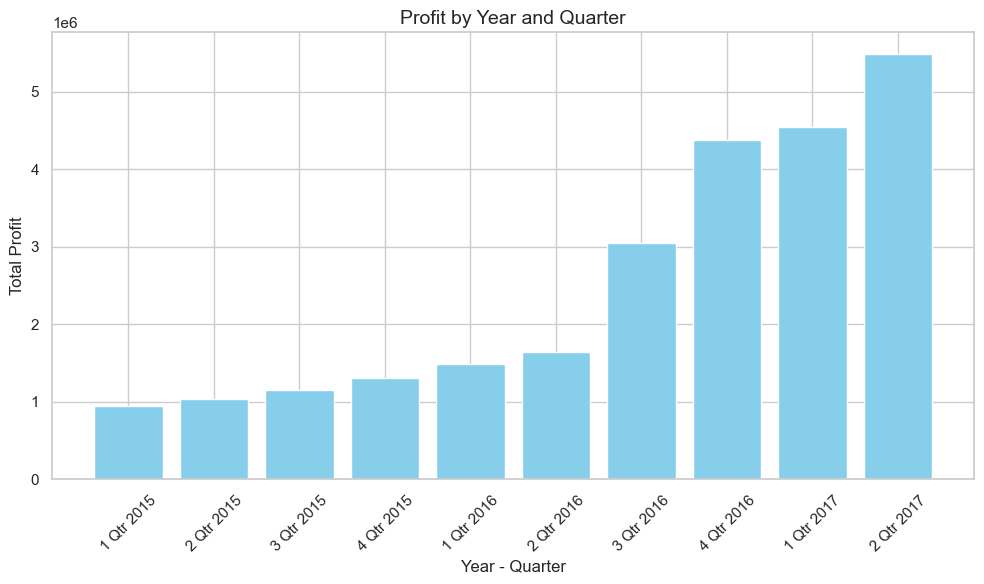

In [30]:
# Looking at Profit wrt to year, qtr
profit_by_period = df.groupby(['Year', 'Quarter'])['Profit'].sum().reset_index()

plt.figure(figsize = (10,6))

plt.bar(
    profit_by_period['Quarter'].astype(str) + ' Qtr ' + profit_by_period['Year'].astype(str),
    profit_by_period['Profit'],
    color='skyblue'
)

plt.title('Profit by Year and Quarter', fontsize = 14)
plt.xlabel('Year - Quarter')
plt.ylabel('Total Profit')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [31]:
# Based on the graph in 2017 we see the most revenue revenue comming and also the profit.

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\2724330485.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\2724330485.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\2724330485.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\2724330485.py:9: FutureWarning: 

Passing `palette` without assigning `

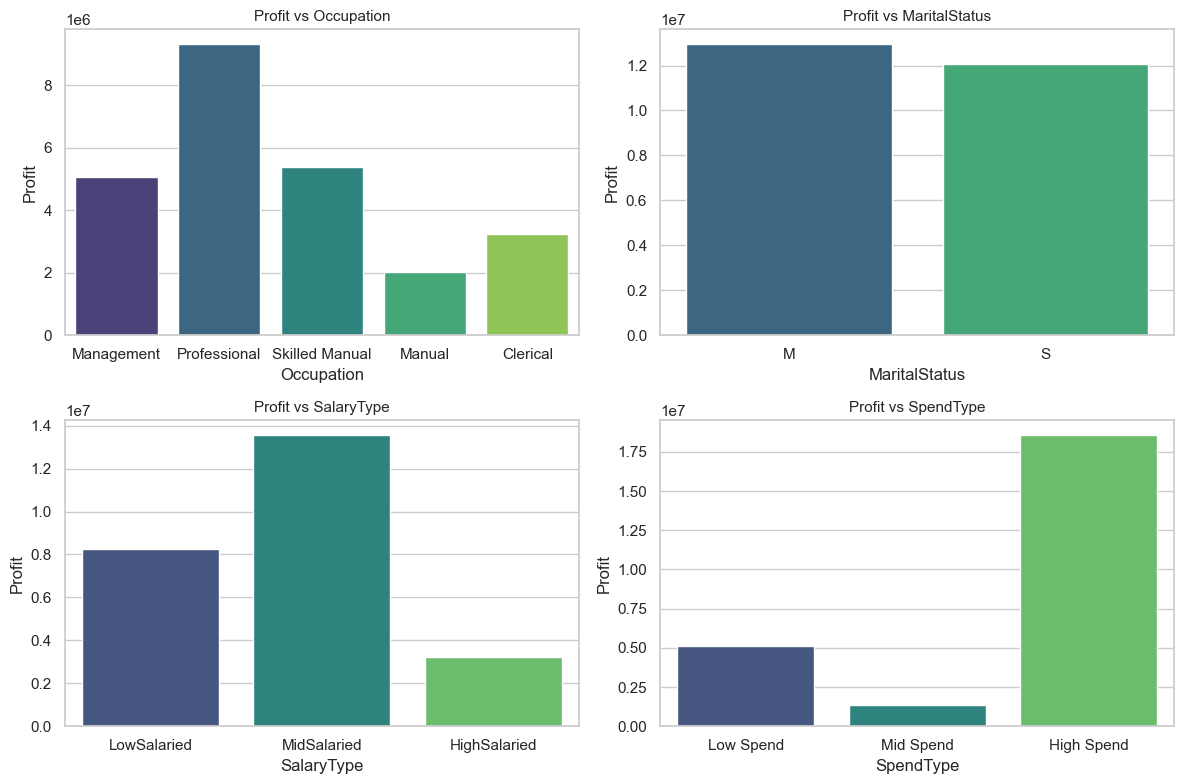

In [32]:
# Looking at Profit wrt to Occupation, MaritalStatus, SalaryType, SpendType

cols = ['Occupation', 'MaritalStatus', 'SalaryType', 'SpendType']

plt.figure(figsize=(12, 8))

for i in range(len(cols)):
    plt.subplot(2, 2, i + 1)  # 2 rows × 2 cols grid
    sns.barplot(data = df, x = cols[i], y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
    plt.title(f'Profit vs {cols[i]}', fontsize=11)
    plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

In [33]:
# People who are professional and they are married tend to generate higher revenue

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1174758102.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'CategoryName', y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\1174758102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'CategoryName', y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')


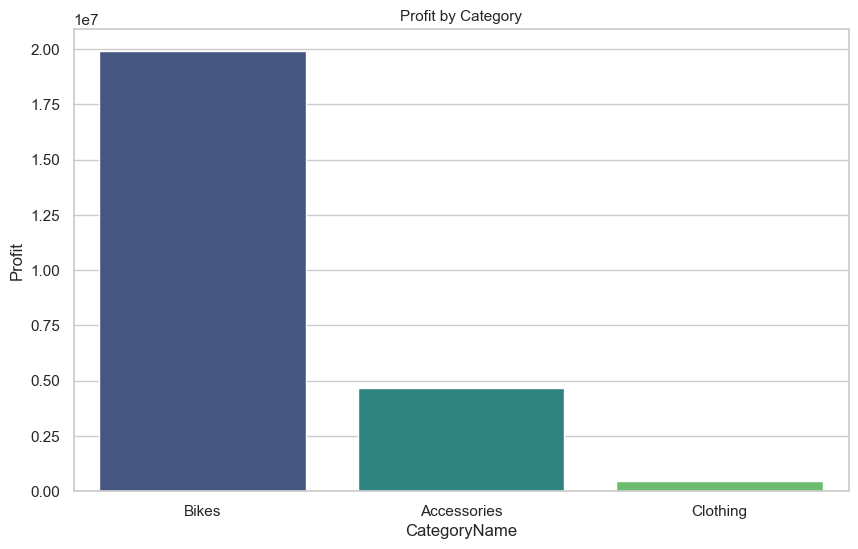

In [34]:
# Profit by product category

plt.figure(figsize=(10, 6))

sns.barplot(data = df, x = 'CategoryName', y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
plt.title('Profit by Category', fontsize=11)
plt.xticks(rotation = 0)
plt.show()

In [35]:
# Based on the graph "Bikes" are leading the most revenue then have "Accessories" and then "Clothin" a higher profit

In [36]:
# Looking at Profit wrt to SubCategoryName
profit_by_category = df.groupby(['CategoryName', 'SubcategoryName'])['Profit'].sum().round(2).reset_index().sort_values(by = 'Profit', ascending = False)
profit_by_category

,CategoryName,SubcategoryName,Profit
8,Bikes,Mountain Bikes,10645954.84
9,Bikes,Road Bikes,7416294.73
10,Bikes,Touring Bikes,1845450.59
7,Accessories,Tires and Tubes,1604856.90
5,Accessories,Helmets,1264581.42
2,Accessories,Bottles and Cages,1065195.03
4,Accessories,Fenders,507299.01
6,Accessories,Hydration Packs,119760.05
14,Clothing,Shorts,115405.29
13,Clothing,Jerseys,105494.29


In [37]:
# Based on the above table we saw that Bikes have a higher profit

In [38]:
# Here we are looking at the profit margin based on the product name
profit_margin_by_pn = df.groupby(['ProductName','ProductPrice'])['profitMargin'].sum().round(2).reset_index().sort_values(by = 'profitMargin', ascending = False)
profit_margin_by_pn

,ProductName,ProductPrice,profitMargin
126,Water Bottle - 30 oz.,4.99,5859360.00
23,Mountain Tire Tube,4.99,2763164.00
52,Patch Kit/8 Patches,2.29,2724665.00
22,Mountain Bottle Cage,9.99,1493260.40
101,"Sport-100 Helmet, Red",34.99,1464902.60
...,...,...,...
24,"Mountain-100 Black, 38",3374.99,1137.76
25,"Mountain-100 Black, 42",3374.99,1137.76
29,"Mountain-100 Silver, 42",3399.99,1094.00
30,"Mountain-100 Silver, 44",3399.99,1050.24


In [39]:
# Products like "Water Bottle - 30 oz.", "Mountain Tire Tube", "Patch Kit/8 Patches", "Mountain Bottle Cage" are more profitable

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\3010056319.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\3010056319.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\3010056319.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = cols[i], y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\3010056319.py:9: FutureWarning: 

Passing `palette` without assigning `

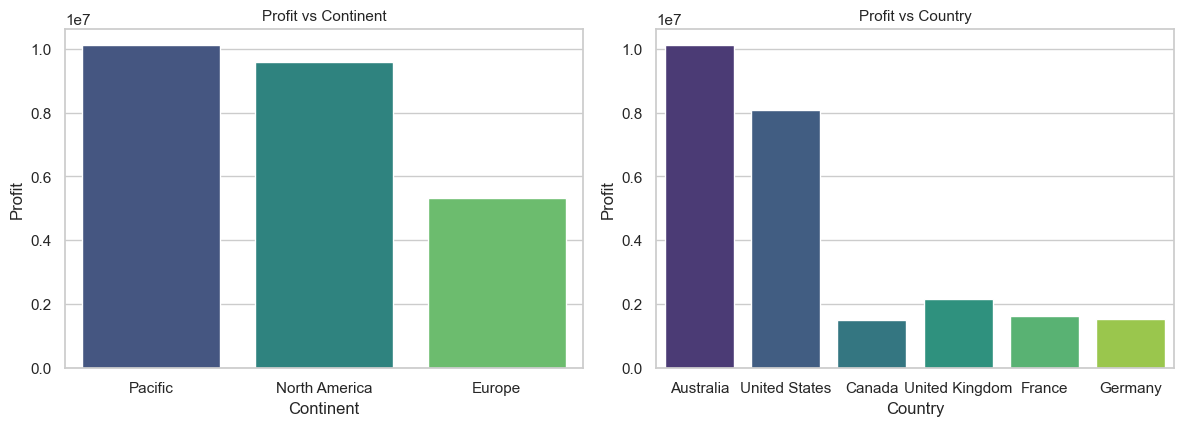

In [40]:
# Profit based on "Continent", "Country" and "Region"

cols = ['Continent', 'Country']

plt.figure(figsize=(12, 8))

for i in range(len(cols)):
    plt.subplot(2, 2, i + 1)  # 2 rows × 2 cols grid
    sns.barplot(data = df, x = cols[i], y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
    plt.title(f'Profit vs {cols[i]}', fontsize=11)
    plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\2708254519.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'Region', y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\2708254519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Region', y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')


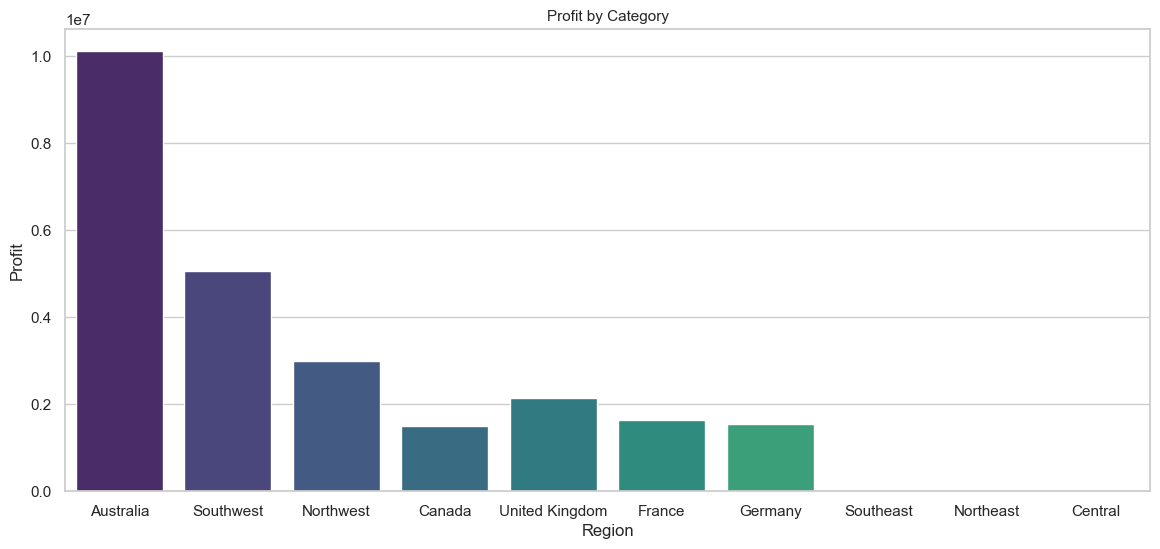

In [41]:
# Profit based on "Region"

plt.figure(figsize=(14, 6))

sns.barplot(data = df, x = 'Region', y = 'Profit', estimator = 'sum', ci = None, palette = 'viridis')
plt.title('Profit by Category', fontsize=11)
plt.xticks(rotation = 0)
plt.show()

In [42]:
# Revenue and profit is mostly driven by the "Pacific" continent where "Australia" is leading the revenue as well as the profit 

In [43]:
# Looking at ReturnRate wrt to SubCategoryName
profit_by_category = df.groupby(['CategoryName', 'SubcategoryName'])['ReturnRate'].sum().round(2).reset_index().sort_values(by = 'ReturnRate', ascending = False)
profit_by_category

,CategoryName,SubcategoryName,ReturnRate
7,Accessories,Tires and Tubes,93135.17
2,Accessories,Bottles and Cages,75606.83
5,Accessories,Helmets,58182.00
8,Bikes,Mountain Bikes,10929.00
9,Bikes,Road Bikes,10325.00
4,Accessories,Fenders,10010.17
11,Clothing,Caps,7581.67
13,Clothing,Jerseys,6908.00
6,Accessories,Hydration Packs,3443.00
14,Clothing,Shorts,2584.00


In [44]:
# Lookin at the return rate of the products it seems like 'Tires and Tubes' have the highest return rate

# Bivariate Analysis

In [45]:
df.describe()

,OrderDate,StockDate,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,AnnualIncome,TotalChildren,ProductSubcategoryKey,...,SalesTerritoryKey,ReturnDate,ReturnQuantity,Revenue,Profit,Year,Quarter,Month,profitMargin,ReturnRate
count,429947,429947,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,...,429947.000000,424467,424467.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,429947.000000,424467.000000
mean,2017-01-11 06:42:57.298131456,2003-11-05 05:23:27.832128128,443.759933,18715.271731,5.997053,2.085064,1.729723,61833.900457,1.911673,29.624782,...,5.997053,2017-01-11 10:44:01.409579776,1.022190,129.434719,58.197019,2016.545377,2.421589,6.339723,59.889505,0.673502
min,2015-01-01 00:00:00,2001-09-11 00:00:00,214.000000,11000.000000,1.000000,1.000000,1.000000,10000.000000,0.000000,1.000000,...,1.000000,2015-01-18 00:00:00,1.000000,2.290000,1.433500,2015.000000,1.000000,1.000000,23.000000,0.333333
25%,2016-10-23 00:00:00,2003-08-17 00:00:00,477.000000,13910.000000,4.000000,1.000000,1.000000,40000.000000,0.000000,28.000000,...,4.000000,2016-10-24 00:00:00,1.000000,9.980000,6.247400,2016.000000,1.000000,3.000000,62.600000,0.500000
50%,2017-01-20 00:00:00,2003-11-13 00:00:00,478.000000,18092.000000,6.000000,2.000000,2.000000,60000.000000,2.000000,31.000000,...,6.000000,2017-01-19 00:00:00,1.000000,14.970000,9.371100,2017.000000,2.000000,6.000000,62.600000,0.500000
75%,2017-04-15 00:00:00,2004-02-07 00:00:00,528.000000,23165.500000,9.000000,3.000000,2.000000,80000.000000,3.000000,37.000000,...,9.000000,2017-04-11 00:00:00,1.000000,34.990000,21.903700,2017.000000,4.000000,10.000000,62.600000,1.000000
max,2017-06-30 00:00:00,2004-06-15 00:00:00,606.000000,29483.000000,10.000000,8.000000,3.000000,170000.000000,5.000000,37.000000,...,10.000000,2017-06-30 00:00:00,2.000000,3578.270000,1487.835600,2017.000000,4.000000,12.000000,64.250000,2.000000
std,NaN,NaN,110.777367,5383.431116,2.938500,0.973138,0.615131,31813.382408,1.656574,8.708358,...,2.938500,NaN,0.147302,461.918002,195.051233,0.518661,1.137166,3.545411,8.268584,0.267023


In [46]:
df.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity', 'Prefix', 'FirstName',
       'LastName', 'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress',
       'AnnualIncome', 'TotalChildren', 'EducationLevel', 'Occupation',
       'HomeOwner', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice', 'SubcategoryName',
       'ProductCategoryKey', 'CategoryName', 'SalesTerritoryKey', 'Region',
       'Country', 'Continent', 'ReturnDate', 'ReturnQuantity', 'Revenue',
       'Profit', 'Year', 'Quarter', 'Month', 'profitMargin', 'SpendType',
       'SalaryType', 'ReturnRate'],
      dtype='object')

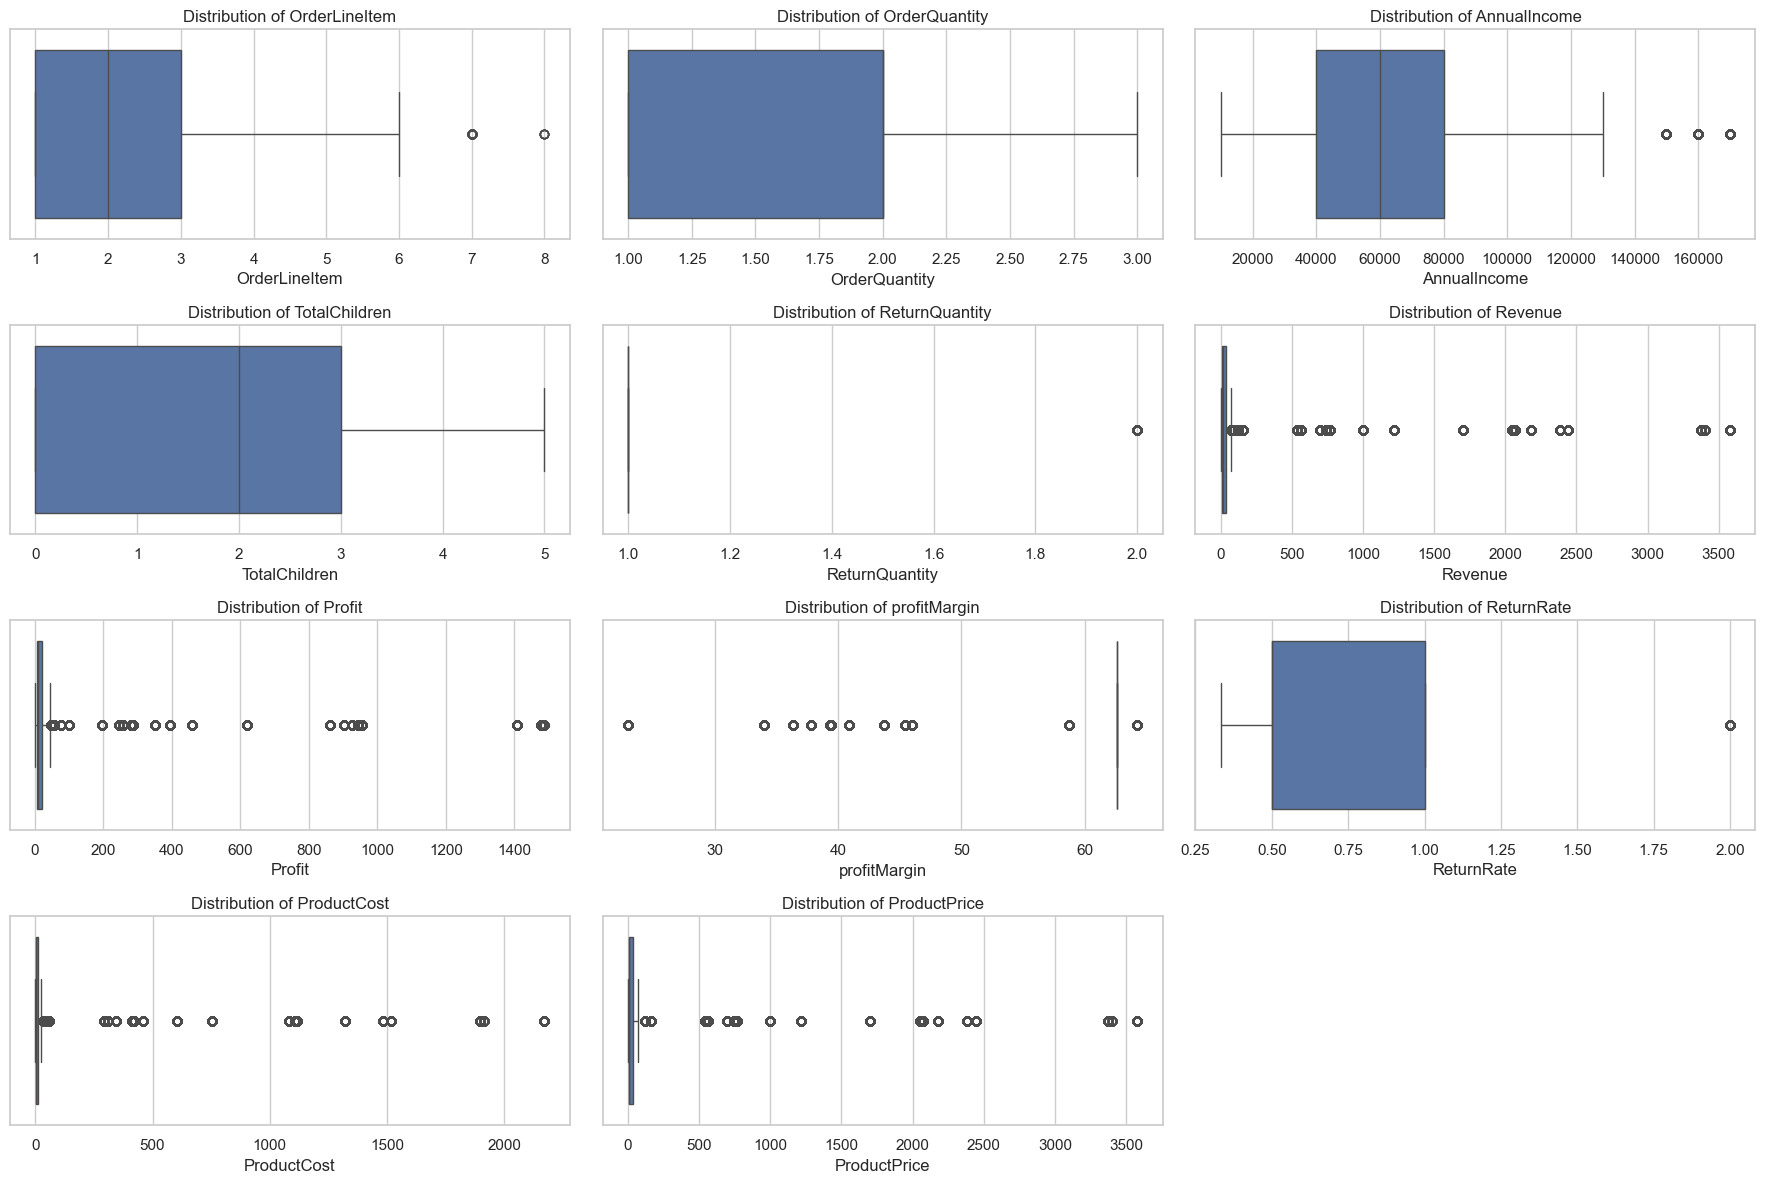

In [59]:
plt.figure(figsize=(18, 12))

cols = [
    'OrderLineItem', 'OrderQuantity', 'AnnualIncome',
    'TotalChildren', 'ReturnQuantity', 'Revenue', 'Profit',
    'profitMargin', 'ReturnRate', 'ProductCost', 'ProductPrice'
]

for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)  # 4 rows × 3 cols = 12 subplots (enough for 11 columns)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

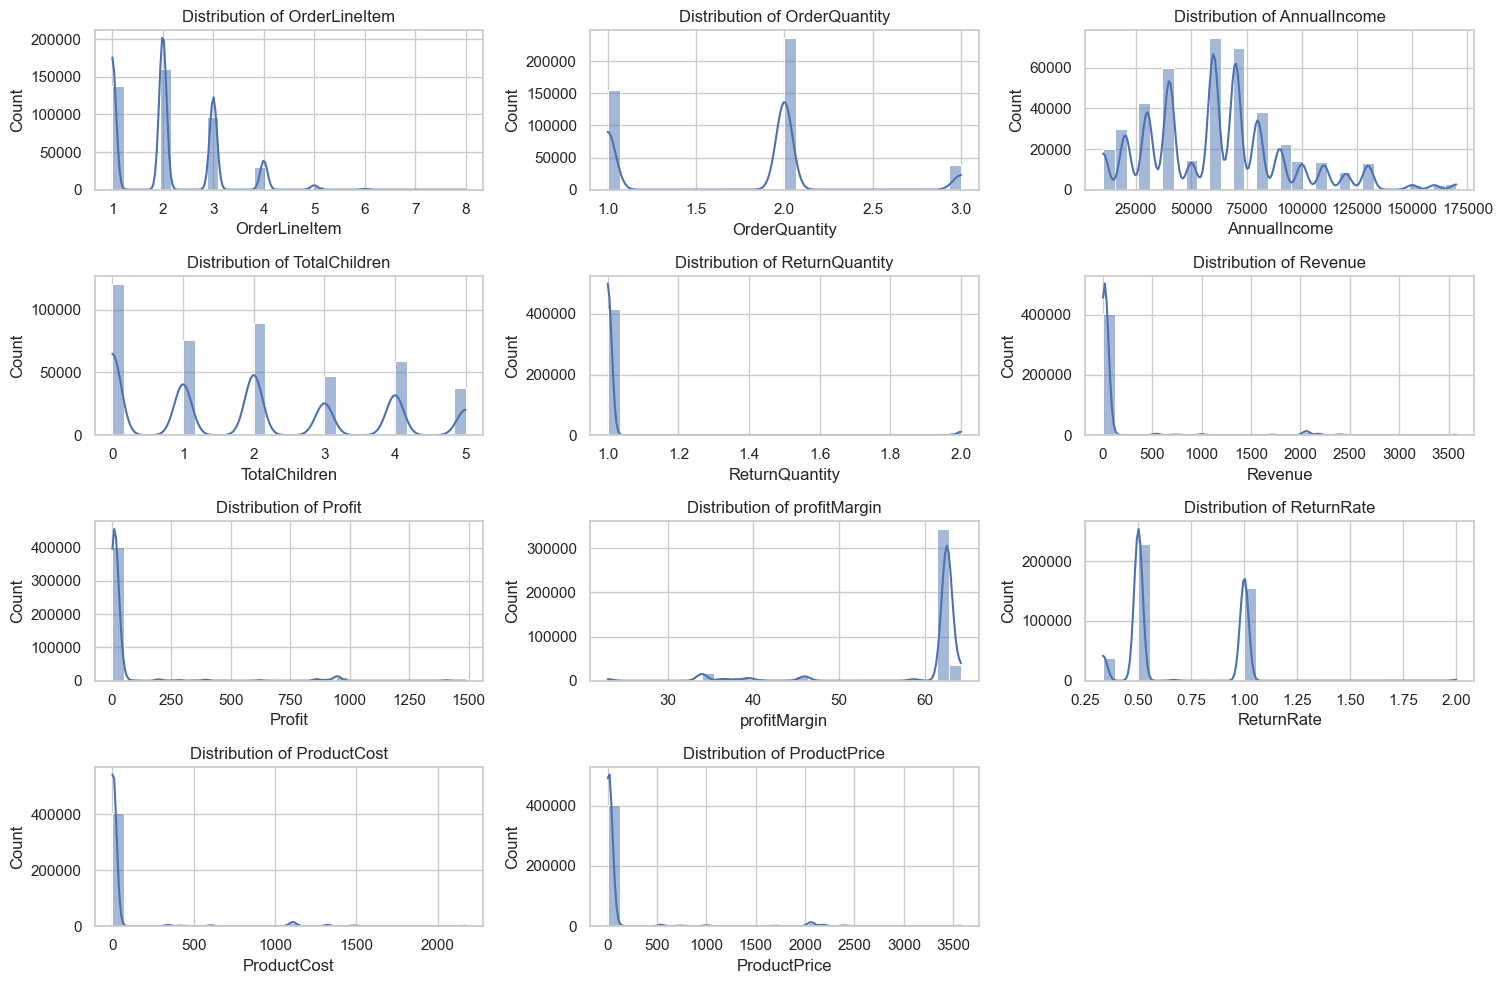

In [60]:
plt.figure(figsize=(15, 10))

cols = [
    'OrderLineItem', 'OrderQuantity', 'AnnualIncome',
    'TotalChildren', 'ReturnQuantity', 'Revenue', 'Profit',
    'profitMargin', 'ReturnRate', 'ProductCost', 'ProductPrice'
]

for i in range(len(cols)):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[cols[i]], kde = True, bins = 30)
    plt.title(f'Distribution of {cols[i]}')

plt.tight_layout()
plt.show()

# Multivariate Analysis

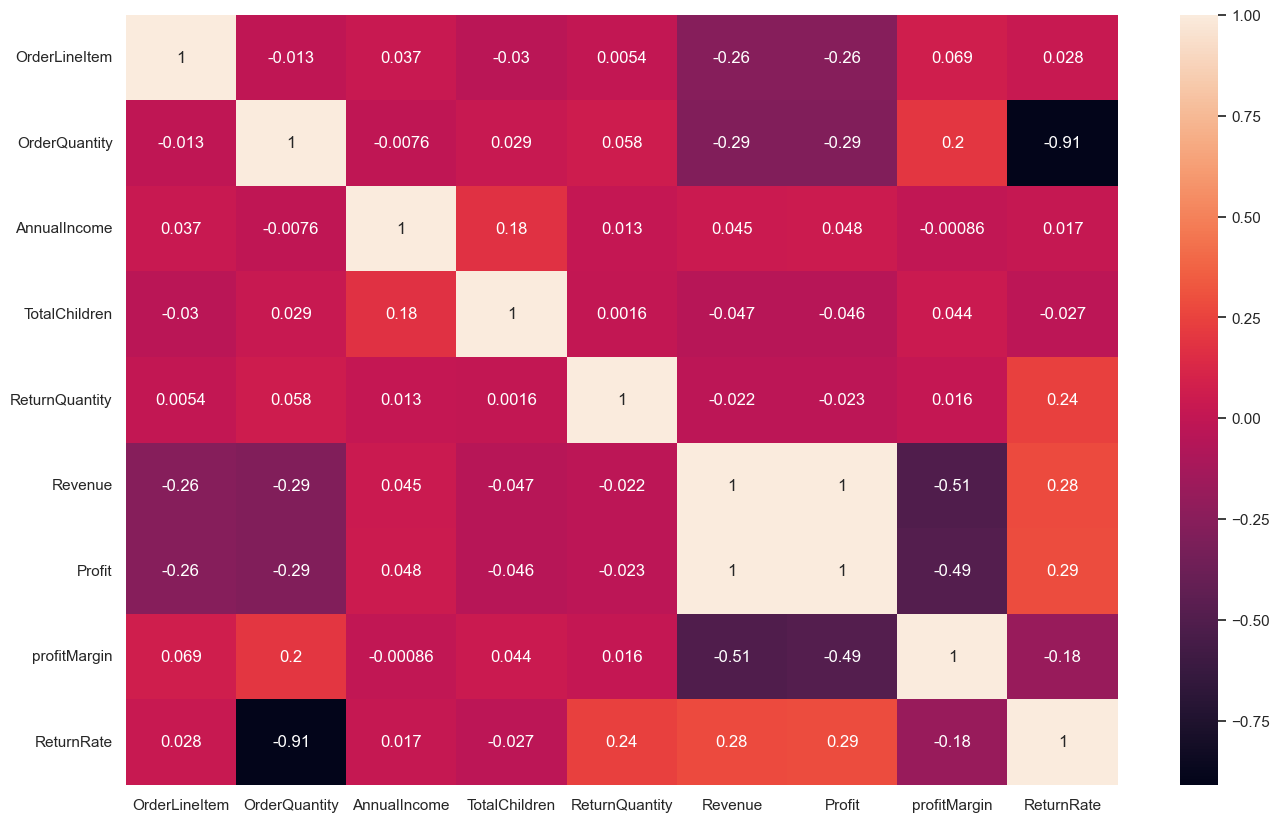

In [49]:
# Correlation Table - Heat Map
plt.figure(figsize=(16, 10))

cols = [
    'OrderLineItem', 'OrderQuantity', 'AnnualIncome',
    'TotalChildren', 'ReturnQuantity', 'Revenue', 'Profit',
    'profitMargin', 'ReturnRate'
]

sns.heatmap(data = df[cols].corr(), annot = True, cmap = 'rocket')
plt.show()

In [50]:
df.to_csv('AW_EDA.csv', index = False)

# Data Preprocessing

In [51]:
model_data = df.copy()

In [52]:
# Removing unnesecary cols
model_data.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity', 'Prefix', 'FirstName',
       'LastName', 'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress',
       'AnnualIncome', 'TotalChildren', 'EducationLevel', 'Occupation',
       'HomeOwner', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice', 'SubcategoryName',
       'ProductCategoryKey', 'CategoryName', 'SalesTerritoryKey', 'Region',
       'Country', 'Continent', 'ReturnDate', 'ReturnQuantity', 'Revenue',
       'Profit', 'Year', 'Quarter', 'Month', 'profitMargin', 'SpendType',
       'SalaryType', 'ReturnRate'],
      dtype='object')

In [55]:
cols_to_remove = [
    'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey', 'TerritoryKey',
    'OrderLineItem', 'Prefix', 'FirstName', 'LastName', 'BirthDate', 'MaritalStatus',
    'Gender', 'EmailAddress', 'AnnualIncome', 'TotalChildren', 'EducationLevel',
    'Occupation', 'HomeOwner', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
    'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize', 'ProductStyle',
    'ProductCategoryKey', 'SubcategoryName', 'CategoryName', 'SalesTerritoryKey',
    'Region', 'Country', 'Continent', 'ReturnDate', 'ReturnQuantity', 'Profit',
    'Year', 'Quarter', 'Month', 'profitMargin', 'SpendType', 'SalaryType', 'ReturnRate'
]

model_data = model_data.drop(cols_to_remove, axis=1, errors='ignore')

In [57]:
model_data.isnull().sum()

OrderDate        0
OrderQuantity    0
ProductCost      0
ProductPrice     0
Revenue          0
dtype: int64

# Data Transformation

In [61]:
# Creating a log transformation
model_data['Revenue'] = np.log1p(model_data['Revenue'])
model_data['ProductCost'] = np.log1p(model_data['ProductCost'])
model_data['ProductPrice'] = np.log1p(model_data['ProductPrice'])

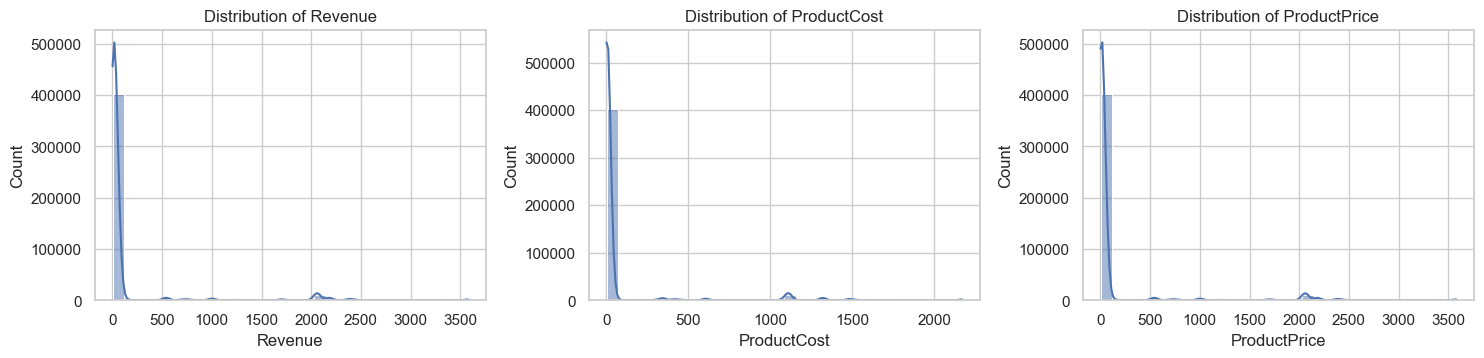

In [63]:
plt.figure(figsize=(15, 10))
cols = ['Revenue', 'ProductCost', 'ProductPrice']

for i in range(len(cols)):
    plt.subplot(3, 3, i + 1)  # 3 rows × 3 cols grid
    sns.histplot(df[cols[i]], kde = True, bins = 30)
    plt.title(f'Distribution of {cols[i]}')

plt.tight_layout()
plt.show()

In [64]:
# Convert to datetime
model_data['OrderDate'] = pd.to_datetime(model_data['OrderDate'])

In [65]:
# Calculating profit
model_data['Profit'] = model_data['OrderQuantity'] * (model_data['ProductPrice'] - model_data['ProductCost'])

In [66]:
# Remove missing or negative values
model_data = model_data.dropna(subset=['Revenue'])
model_data = model_data[model_data['Revenue'] > 0]
model_data = model_data.sort_values('OrderDate')

In [67]:
monthly = model_data.set_index('OrderDate').resample('M')['Revenue'].sum().to_frame()

C:\Users\BINAY\AppData\Local\Temp\ipykernel_11108\4057168558.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = model_data.set_index('OrderDate').resample('M')['Revenue'].sum().to_frame()


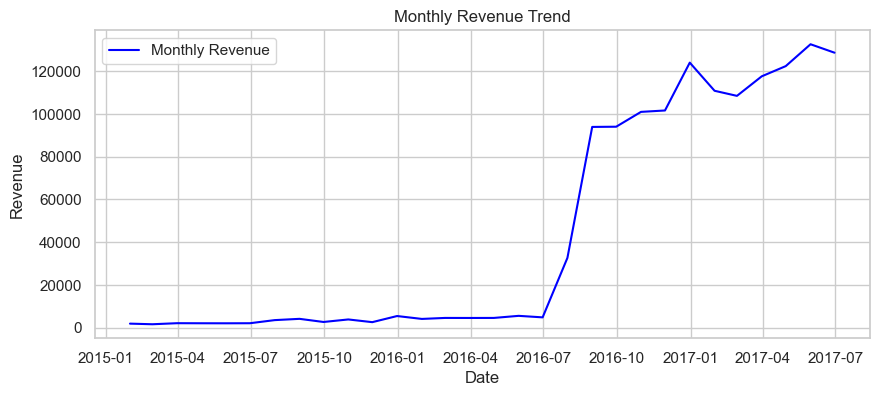

In [68]:
plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly['Revenue'], label = 'Monthly Revenue', color = 'blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [71]:
# Using a basic ARIMA(1,1,1) model. 

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

train = monthly.iloc[:-3]   # all except last 3 months
test = monthly.iloc[-3:]    # last 3 months

model = ARIMA(train['Revenue'], order=(1,1,1))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -284.959
Date:                Tue, 14 Oct 2025   AIC                            575.917
Time:                        19:44:19   BIC                            579.691
Sample:                    01-31-2015   HQIC                           577.004
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2732      1.344      0.203      0.839      -2.361       2.908
ma.L1         -0.0060      1.383     -0.004      0.997      -2.716       2.704
sigma2      2.259e+08   3.19e-08   7.07e+15      0.0

In [72]:

forecast = result.get_forecast(steps=3)
pred = forecast.predicted_mean
conf = forecast.conf_int()

# Display forecast
print(pred)

2017-04-30    119980.937234
2017-05-31    120646.897821
2017-06-30    120828.824698
Freq: ME, Name: predicted_mean, dtype: float64


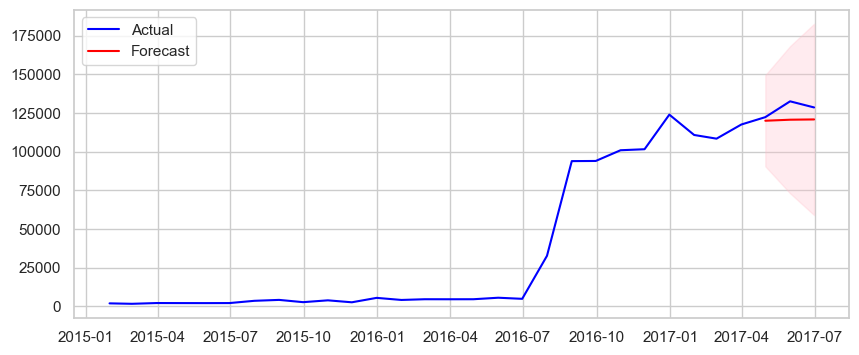

In [73]:
# Plot forecast vs actual
plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly['Revenue'], label='Actual', color='blue')
plt.plot(pred.index, pred, label='Forecast', color='red')
plt.fill_between(conf.index, conf.iloc[:,0], conf.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [75]:
# Evaluating model performance

mae = mean_absolute_error(test['Revenue'], pred)
rmse = np.sqrt(mean_squared_error(test['Revenue'], pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 7319.316280871411
RMSE: 8299.611743598154


In [76]:
# Forecast next 3 months

final_model = ARIMA(monthly['Revenue'], order=(1,1,1))
final_result = final_model.fit()

future_forecast = final_result.get_forecast(steps=3)
print("Next Quarter Monthly Revenue Forecast:")
print(future_forecast.predicted_mean)
print("\nTotal Next Quarter Revenue:", future_forecast.predicted_mean.sum())

Next Quarter Monthly Revenue Forecast:
2017-07-31    127708.732082
2017-08-31    127428.434417
2017-09-30    127338.307785
Freq: ME, Name: predicted_mean, dtype: float64

Total Next Quarter Revenue: 382475.47428364697
